In [1]:
import statistics as stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Data Analyst - Test Data - US.csv")

In [13]:
data.head(30)

,Review,Location
date,,
2019-08-20,I was very impressed with the resort.\n Great ...,Sebastian
2019-08-20,The rooms were nice the outside needs work als...,Los Angeles
2019-08-20,Great location! I have stayed at this hotel on...,Georgia
2019-08-20,The hotel was adequate for my stay. The strips...,NaN
2019-08-19,"Great location, room was large and spacious. P...",Palm Harbor
2019-08-19,All the options for fun were great! Do wish th...,NaN
2019-08-19,Old. Musty. Motel. \n Bath need an update asap...,NaN
2019-08-19,Loved the layout of the hotel and the relaxing...,NaN
2019-08-19,My wife and I loved everything about it. It’s ...,NaN


In [4]:
data.shape

(6448, 3)

In [5]:
data.isnull().sum() / len(data) * 100

Review       0.852978
date         0.000000
Location    73.464640
dtype: float64

# Date Analysis:

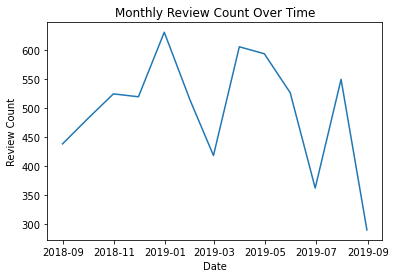

In [6]:

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
monthly_reviews = data.resample('M').size()

plt.plot(monthly_reviews)
plt.title('Monthly Review Count Over Time')
plt.xlabel('Date')
plt.ylabel('Review Count')
plt.show()


# Insight 1.
Highest review on jan 2019
lowest was at Sep 2019
The count of reviews within year fluctuating 

In [7]:
data['Location'].nunique()

1082

In [8]:
data['Location'].unique()

array(['Sebastian', 'Los Angeles', 'Georgia', ..., 'India', 'Malaysia',
       'Trinidad and Tobago'], dtype=object)

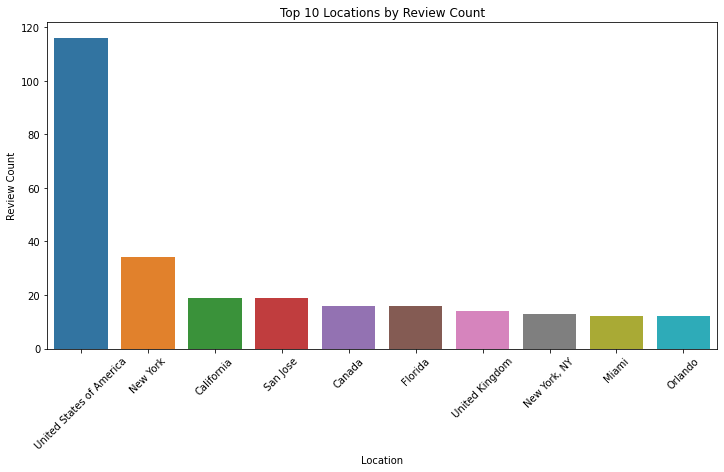

In [9]:

location_review_counts = data['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=location_review_counts.index, y=location_review_counts.values)
plt.title('Top 10 Locations by Review Count')
plt.xlabel('Location')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()


# Insight 2:
Highest Number of review from the united states, 

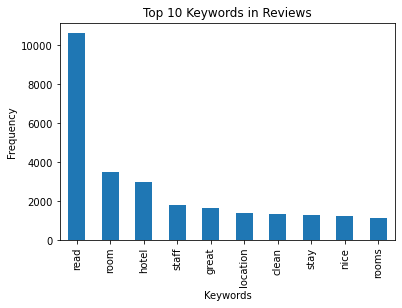

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(data['Review'].dropna())
features = vectorizer.get_feature_names_out()

top_keywords = pd.DataFrame(X.toarray(), columns=features).sum().sort_values(ascending=False)
top_keywords.plot(kind='bar')
plt.title('Top 10 Keywords in Reviews')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()


# Insight 3:
Most used Word in review is Read

In [ ]:
!pip install textblob


In [ ]:
from textblob import TextBlob

# Assuming 'data' is your DataFrame
data['Sentiment'] = data['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.histplot(data['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment Polarity')
plt.show()


# insight 4:
Majority   sentiment score of reviews between 0 and 0.25 would be considered as mildly positive.

In [ ]:


1. Most reviews mention the location of the hotel - whether it is good, bad, or convenient. Location seems to be a key factor in guest satisfaction.

2. Room cleanliness is another common theme, with reviews mentioning if rooms were clean, dirty, or outdated. Cleanliness impacts the guest experience. 

3. Some reviews mention specific room features like the size, beds, or bathrooms. Room size and comfort influence guest opinions.

4. A number of reviews reference the hotel staff and their friendliness, helpfulness or lack thereof. Staff interactions shape the guest experience.

5. Reviews run the gamut from very positive to very negative. There is a wide range in guest satisfaction and hotel quality, underscoring the need for hotels to monitor online reviews and feedback.
